<a href="https://colab.research.google.com/github/monikanaumovskaa/Introduction-to-Data-Science/blob/master/Data_Preparation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

In [5]:
data = pd.read_csv("spaceship_titanic.csv")
data.head() #pokazhuva prvi 5redici
# data.tail()-> pokazhuva posledni 5redici
# data ->gi pokazhuva site

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,NaN,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,NaN,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,NaN,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8292 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         1892 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           7699 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [7]:
data.isnull().sum()

,0
PassengerId,0
HomePlanet,401
CryoSleep,217
Cabin,6801
Destination,182
Age,994
VIP,203
RoomService,181
FoodCourt,183
ShoppingMall,208


In [8]:
percent = data.isnull().sum()/len(data)*100
percent

,0
PassengerId,0.000000
HomePlanet,4.612907
CryoSleep,2.496261
Cabin,78.235362
Destination,2.093639
Age,11.434488
VIP,2.335212
RoomService,2.082135
FoodCourt,2.105142
ShoppingMall,2.392730


**Rename** *columns*

In [9]:
percent = percent.reset_index().rename(columns={"index":"column", 0:"percent missing"})
percent #reset_index se koristi posto e Serija(ednodimenzionalna tabela)

,column,percent missing
0,PassengerId,0.000000
1,HomePlanet,4.612907
2,CryoSleep,2.496261
3,Cabin,78.235362
4,Destination,2.093639
5,Age,11.434488
6,VIP,2.335212
7,RoomService,2.082135
8,FoodCourt,2.105142
9,ShoppingMall,2.392730


<Axes: >

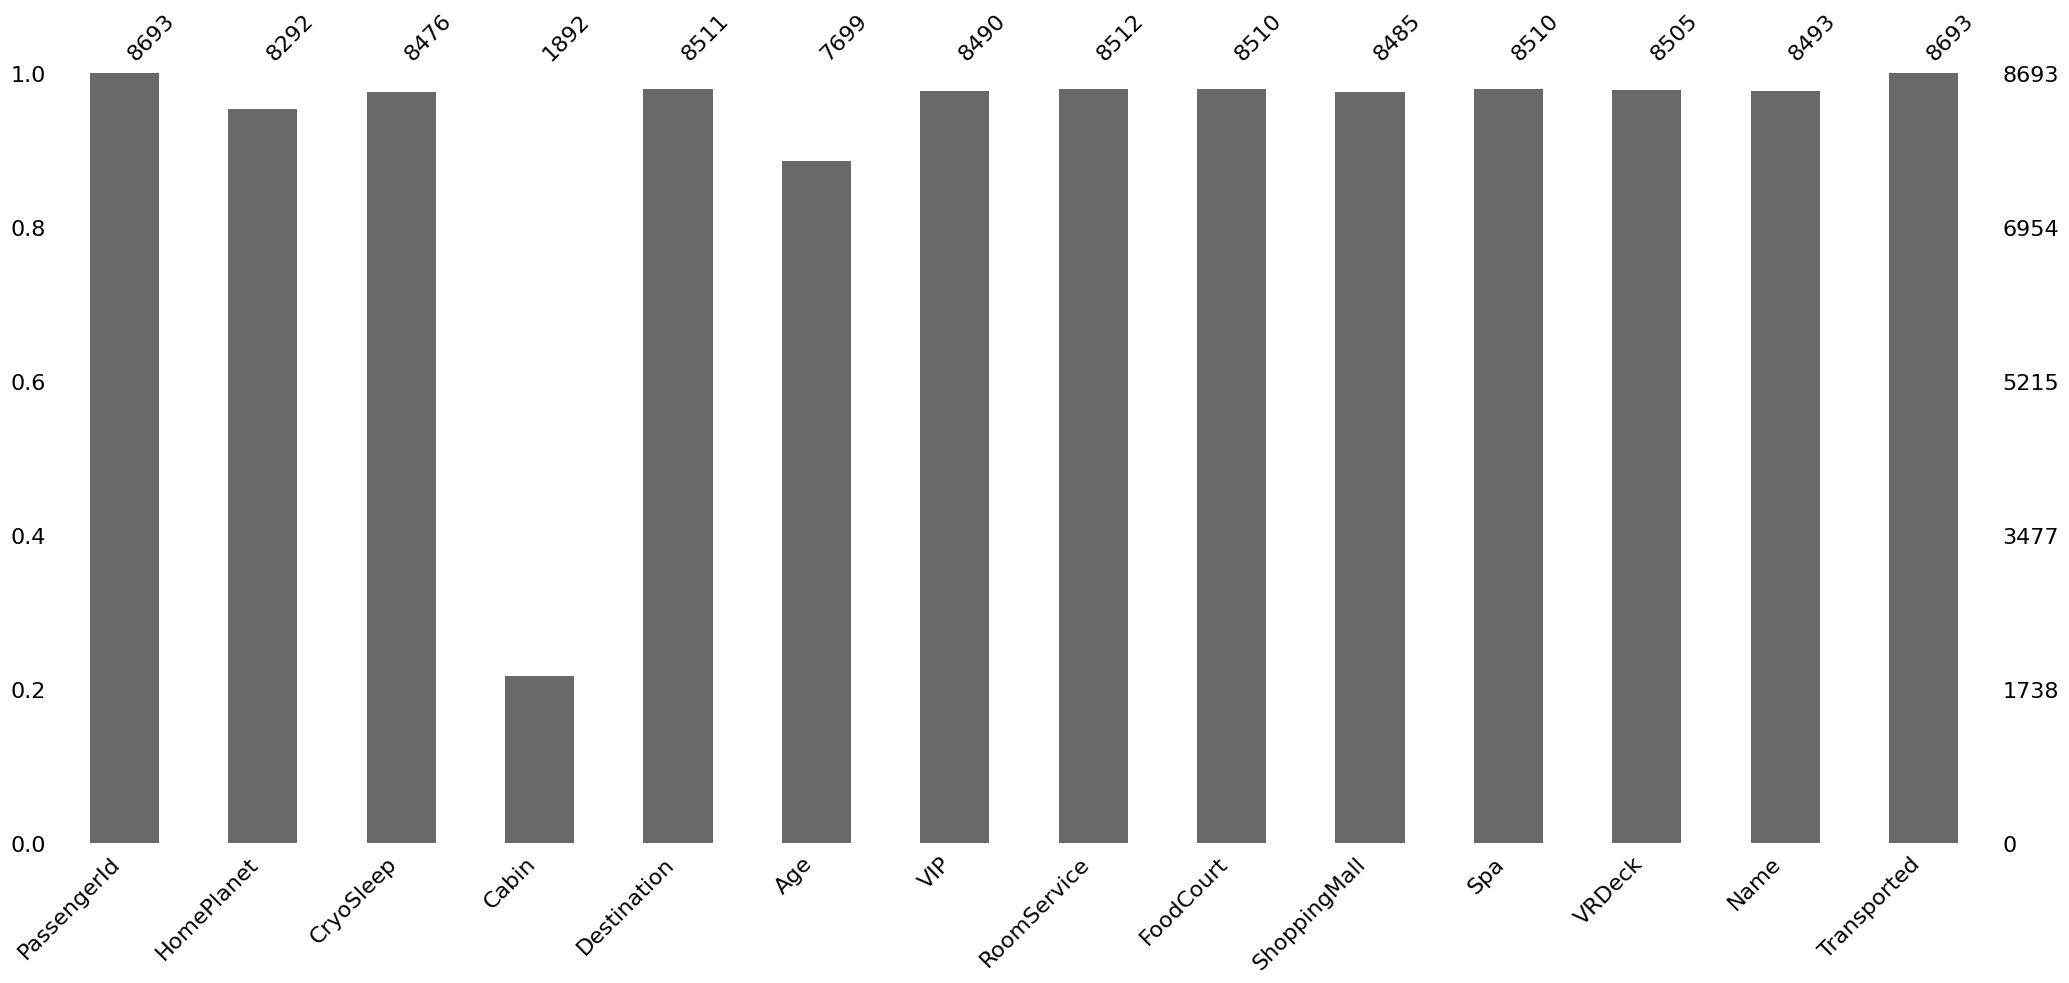

In [10]:
msno.bar(data)
#plt.show()

<Axes: >

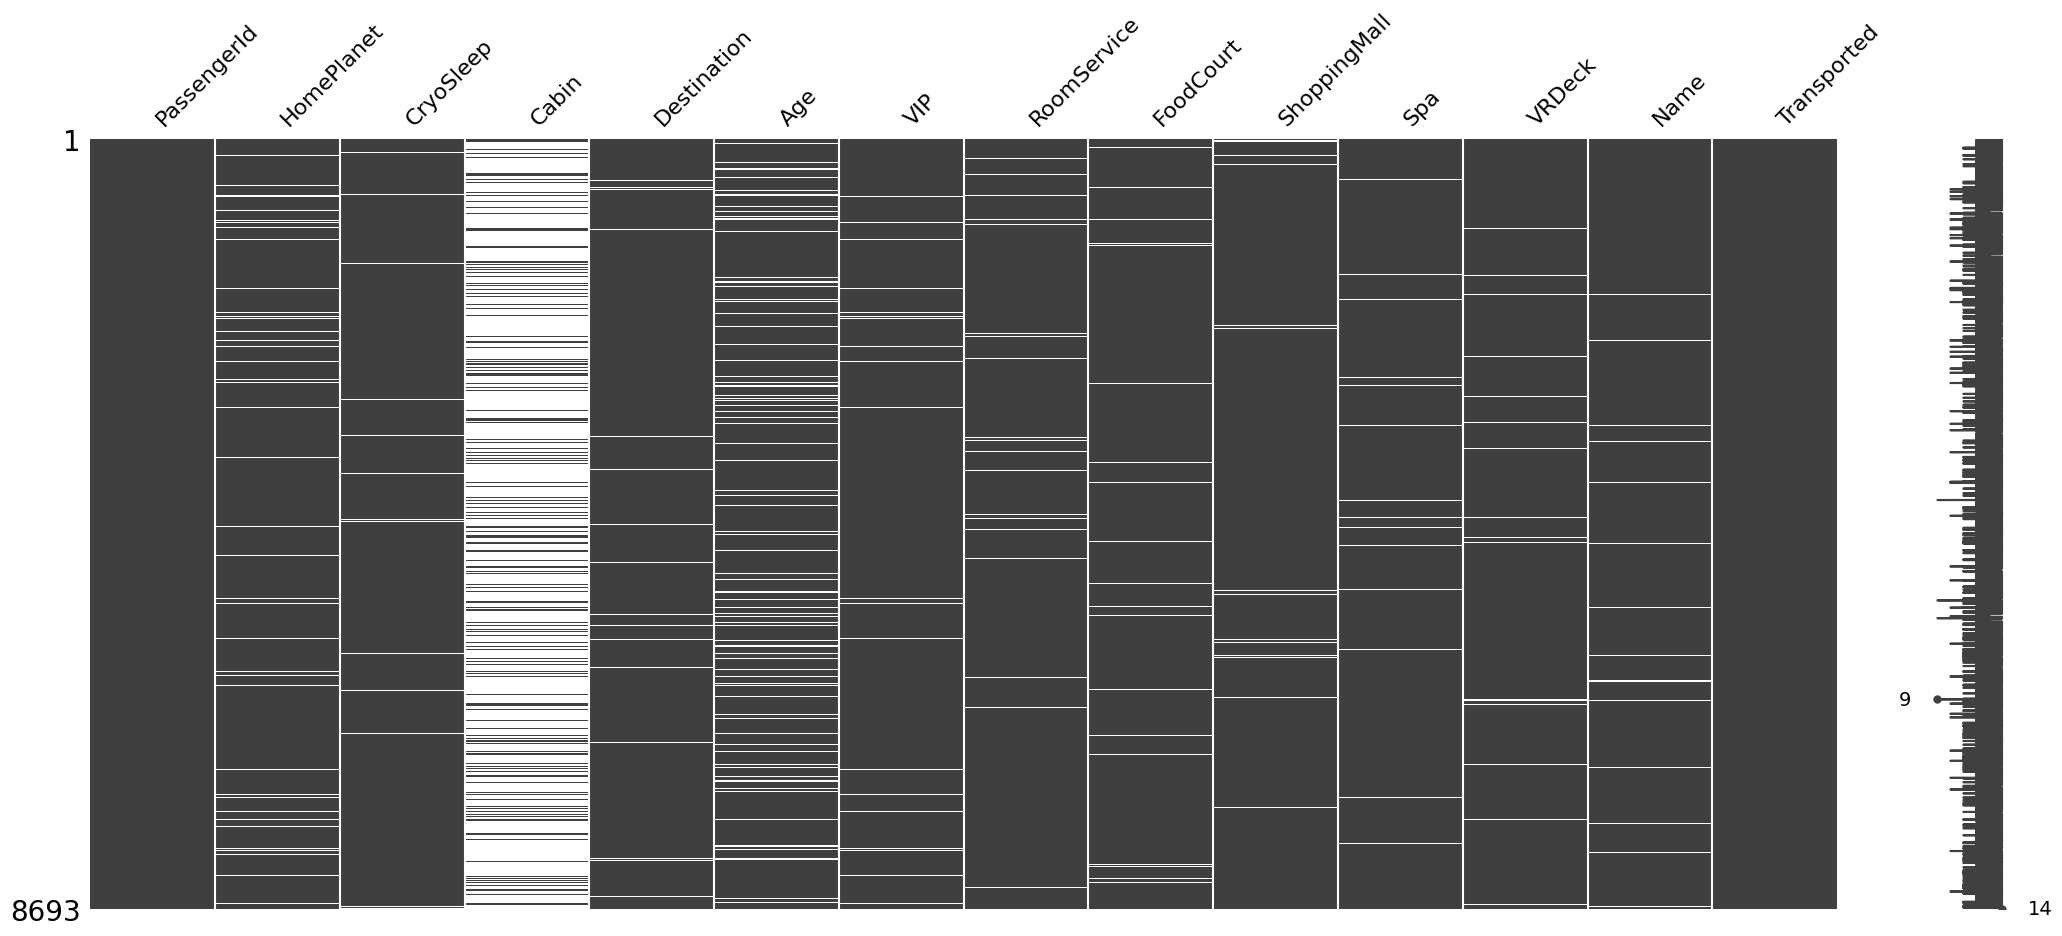

In [11]:
msno.matrix(data)

<Axes: >

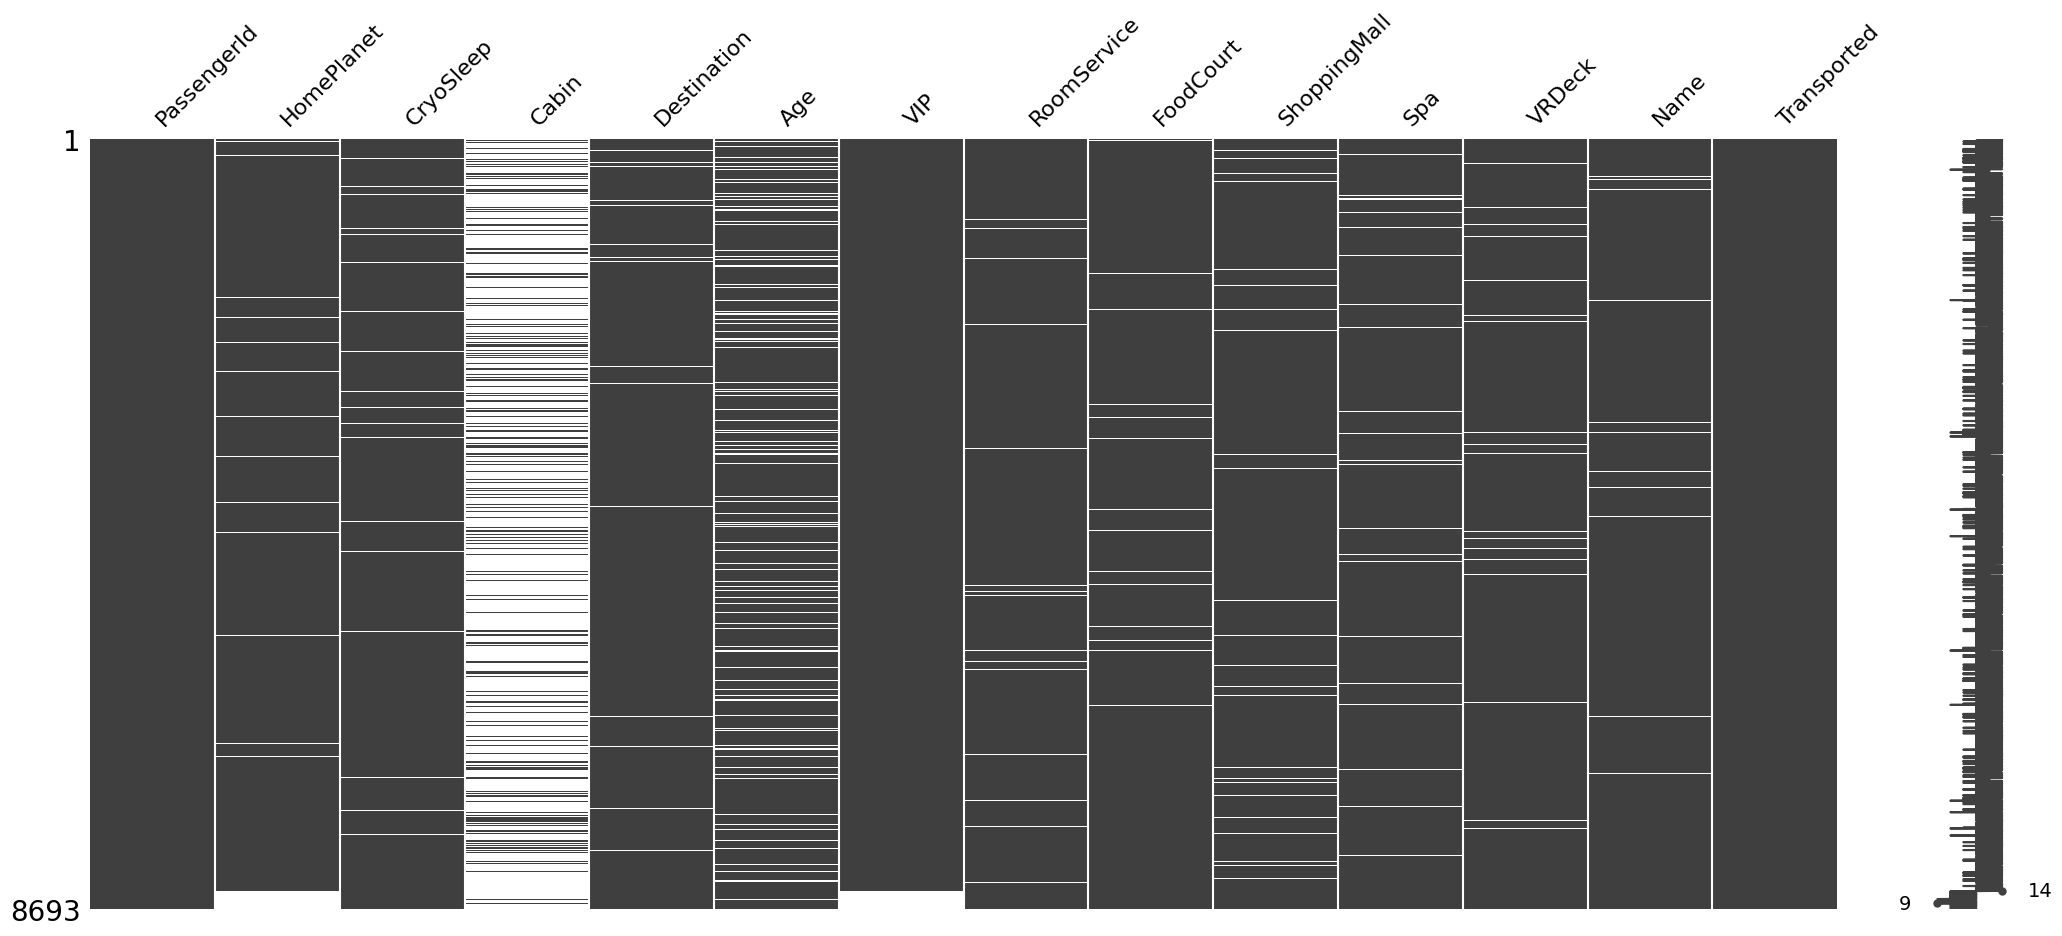

In [12]:
msno.matrix(data.sort_values('VIP'))
#sort_values -->site kaj so nema VIP izbrishi gi od kaj drugite atributi

<Axes: >

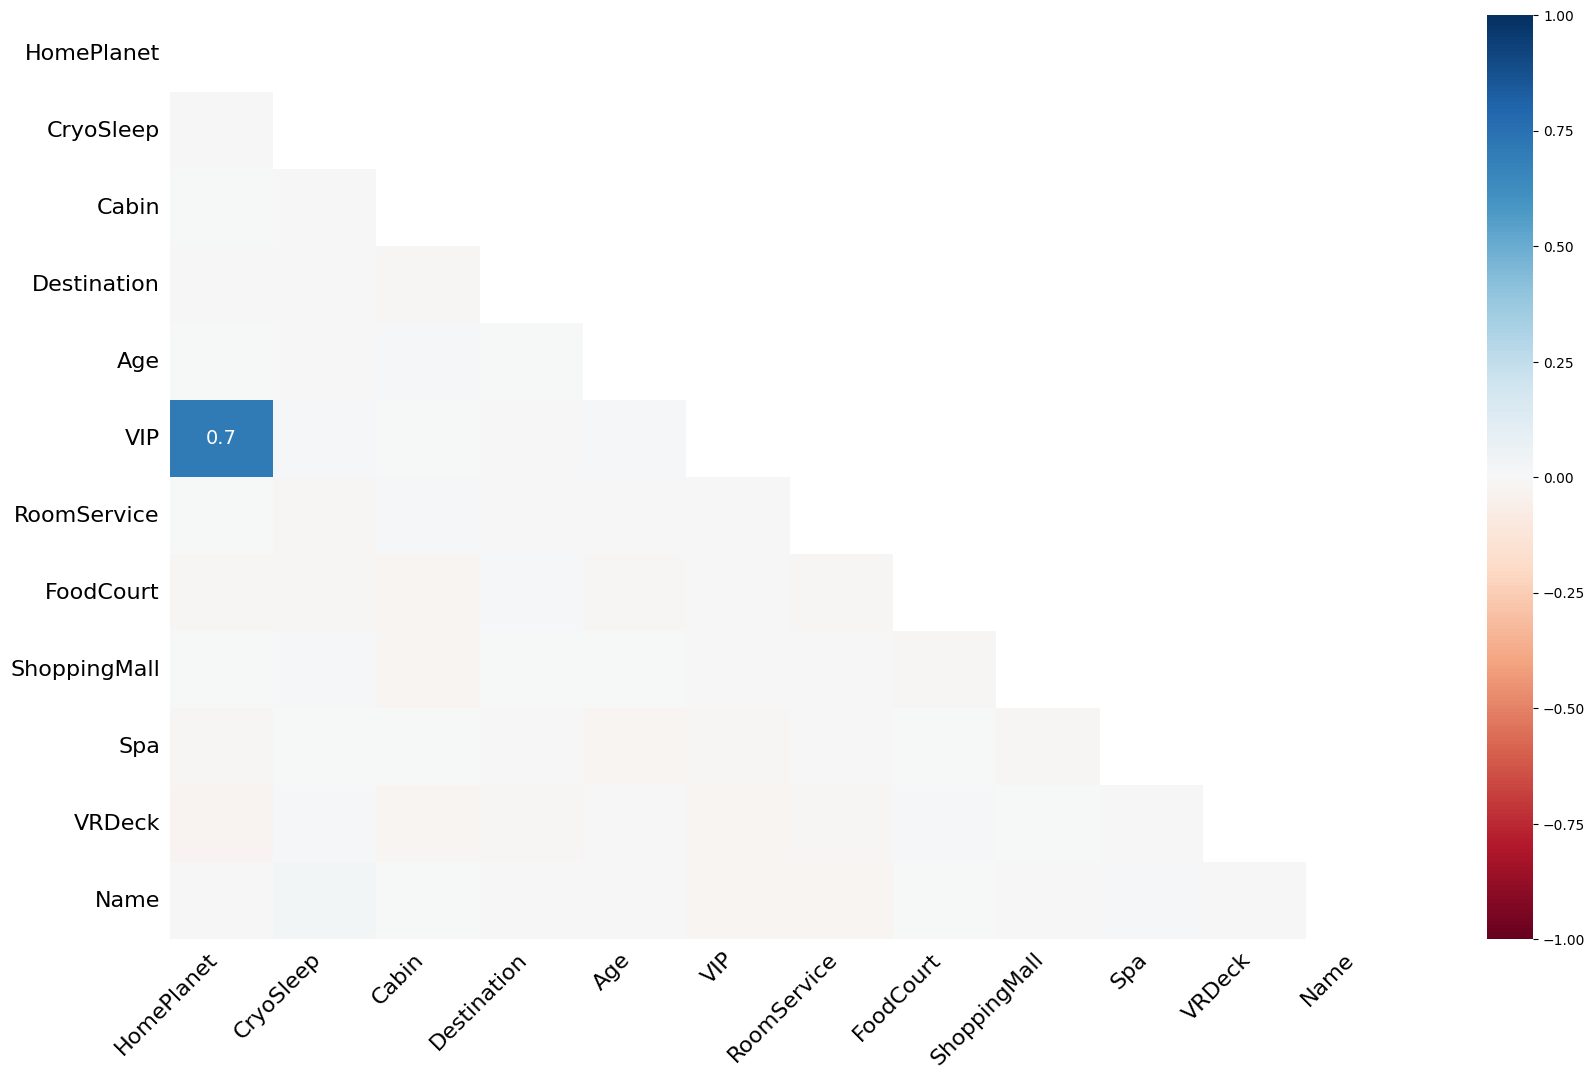

In [13]:
msno.heatmap(data)

HANDLING MISSING VALUES
1. Delete row
2. Delete column
3. Fill the gap

In [14]:
data = data.dropna(subset=["RoomService"], axis = 0)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8512 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8512 non-null   object 
 1   HomePlanet    8121 non-null   object 
 2   CryoSleep     8297 non-null   object 
 3   Cabin         1857 non-null   object 
 4   Destination   8333 non-null   object 
 5   Age           7538 non-null   float64
 6   VIP           8313 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8331 non-null   float64
 9   ShoppingMall  8308 non-null   float64
 10  Spa           8332 non-null   float64
 11  VRDeck        8326 non-null   float64
 12  Name          8313 non-null   object 
 13  Transported   8512 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 939.3+ KB


Brishenje celi koloni so Missing Values gubi golem broj na podatoci i vo ostanatite koloni --> Ne e dobar nachin za spravuvanje

In [15]:
data.isnull().sum() #Serial

,0
PassengerId,0
HomePlanet,391
CryoSleep,215
Cabin,6655
Destination,179
Age,974
VIP,199
RoomService,0
FoodCourt,181
ShoppingMall,204


***IMPUTATION***
with constant, mean, meadian

In [16]:
data

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,NaN,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,NaN,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,NaN,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,NaN,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,NaN,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,NaN,55 Cancri e,NaN,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [17]:
constant_imputer = SimpleImputer(strategy = 'constant', fill_value = 0)

In [25]:
data['FoodCourt'] = constant_imputer.fit_transform([data['FoodCourt']])[0]

In [26]:
data.isnull().sum()

,0
PassengerId,0
HomePlanet,391
CryoSleep,215
Cabin,6655
Destination,179
Age,974
VIP,199
RoomService,0
FoodCourt,0
ShoppingMall,204


# HISTOGRAM

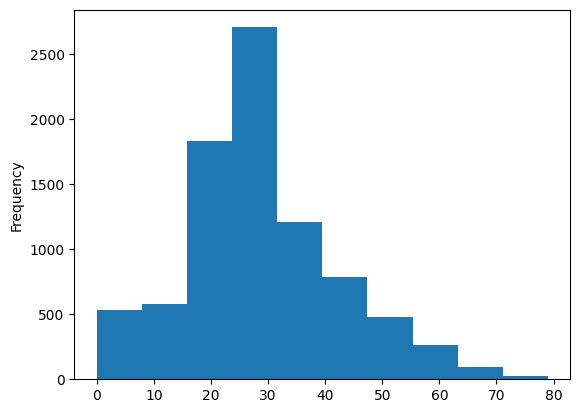

In [66]:
data.Age.plot.hist()
plt.show()

In [67]:
data.Age = data.Age.fillna(data.Age.mean())

In [68]:
data.isnull().sum()

,0
PassengerId,0
HomePlanet,391
CryoSleep,215
Cabin,6655
Destination,179
Age,0
VIP,199
RoomService,0
FoodCourt,0
ShoppingMall,0


In [72]:
data.Spa = data.Spa.fillna(data.Spa.median())

<Axes: ylabel='Frequency'>

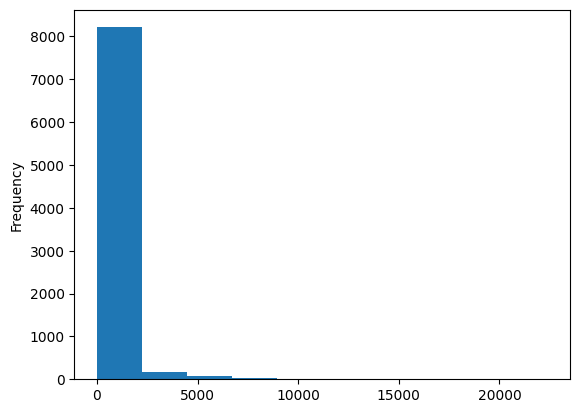

In [73]:
data.Spa.plot.hist()
#plot se koristi od pandas za citanje od DataFrame i Serials

In [75]:
data.Spa = data.Spa.fillna(data.Spa.median())
data.Spa

,Spa
0,0.0
1,549.0
2,6715.0
3,3329.0
4,565.0
...,...
8688,1643.0
8689,0.0
8690,1.0
8691,353.0


# ***Advanced Imputation Techniques***

In [81]:
data.isnull().sum()

,0
PassengerId,0
HomePlanet,391
CryoSleep,215
Cabin,6655
Destination,179
Age,0
VIP,199
RoomService,0
FoodCourt,0
ShoppingMall,0


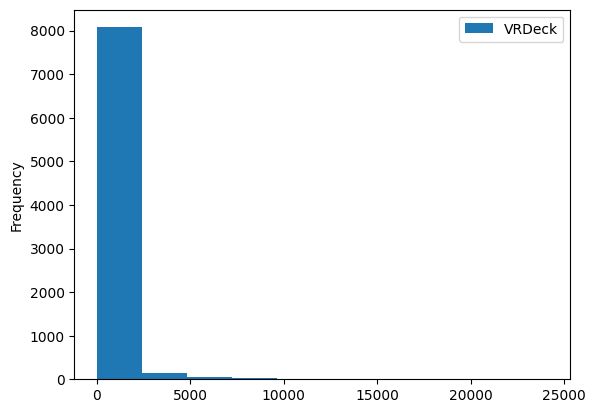

In [83]:
data[['VRDeck', 'Name']].plot.hist(subplots=True) #subplots true--> sekoja kolona razl hist
plt.show()

# *MICE*- Multiple Imputation by Chained Equations

In [84]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

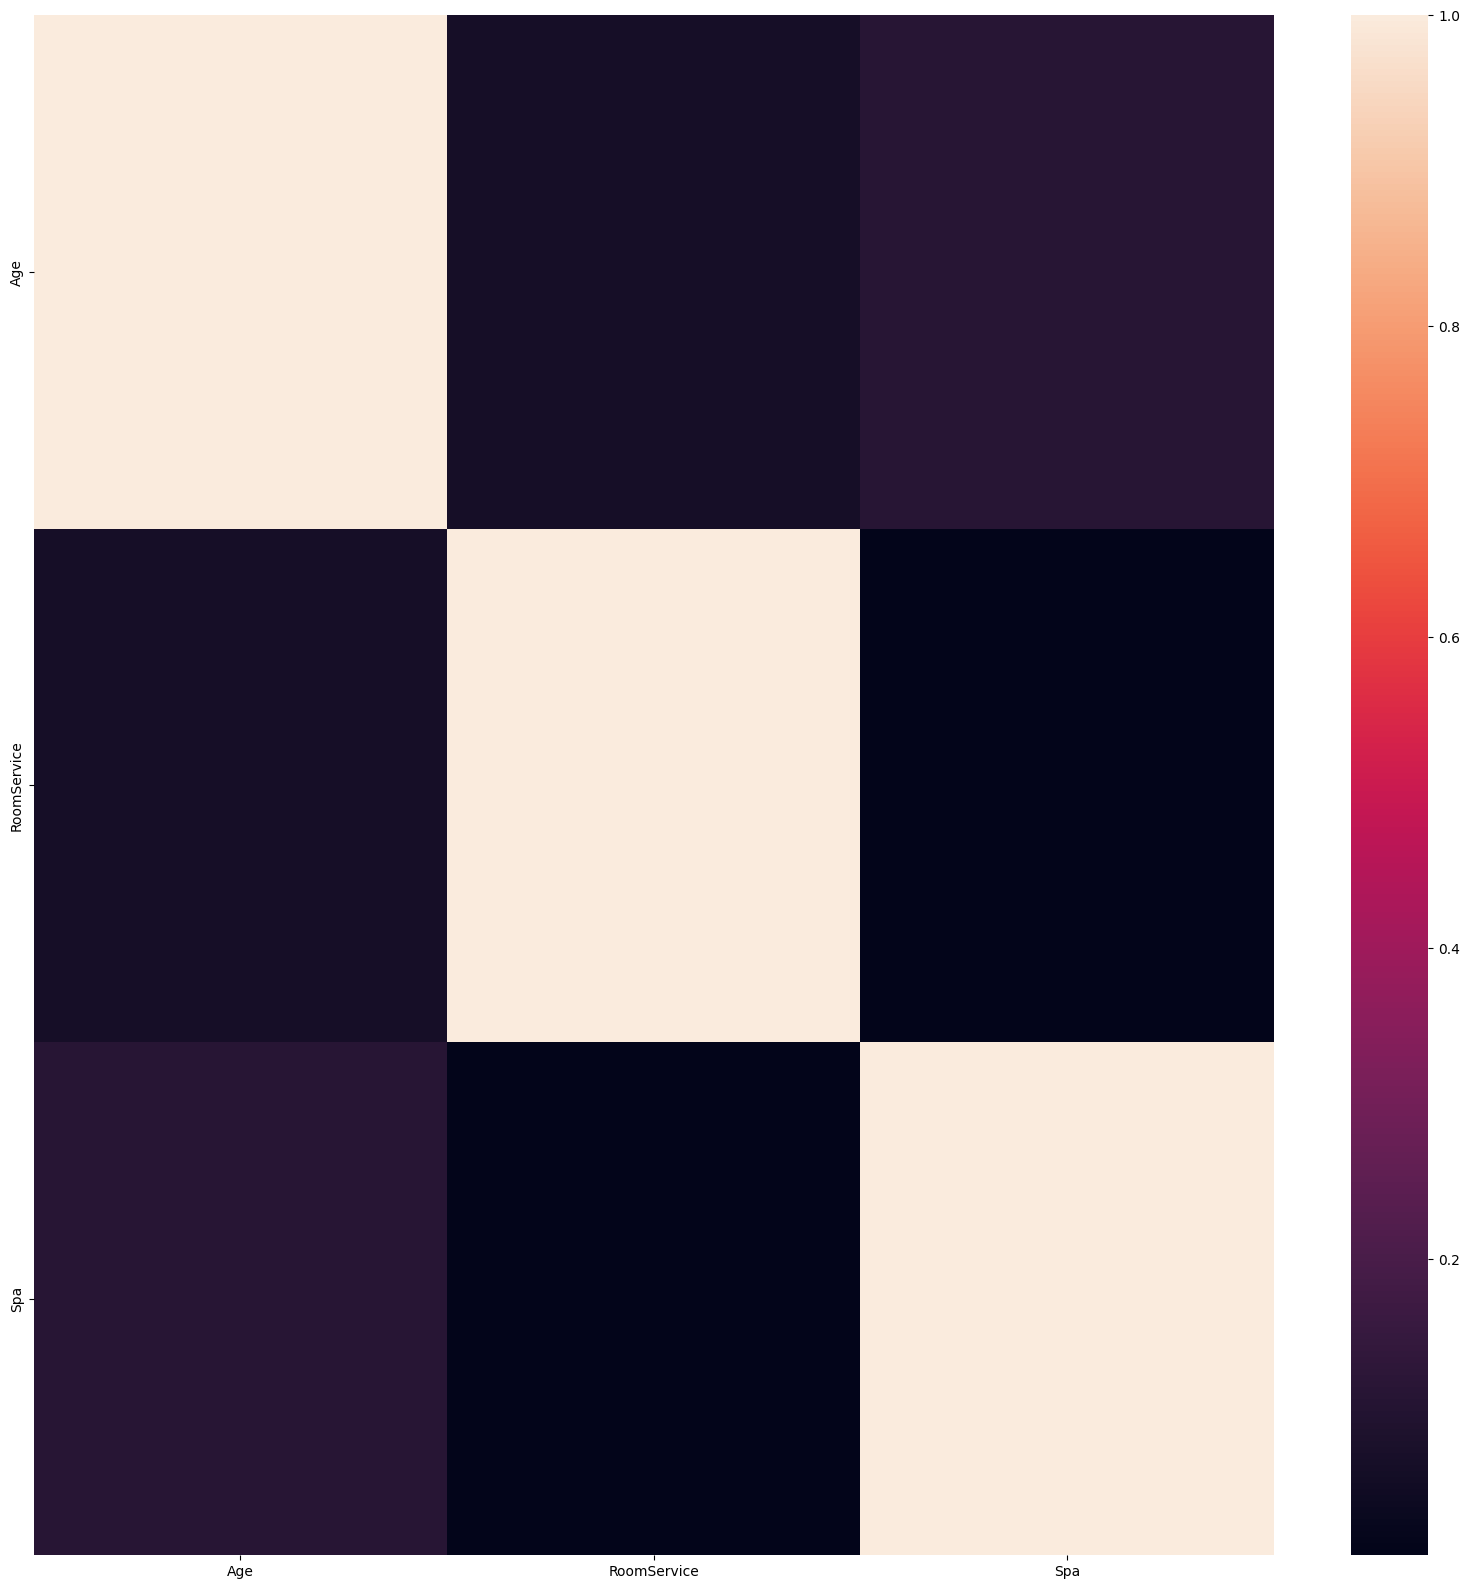

In [86]:
plt.figure(figsize=(20,20))
sns.heatmap(data[['Age', 'RoomService', 'Spa']].corr())
plt.show()

In [87]:
data['VIP'] = data['VIP'].ffill()

<ipython-input-87-4e7328854e5f>:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['VIP'] = data['VIP'].ffill()


In [88]:
data.isnull().sum()

,0
PassengerId,0
HomePlanet,391
CryoSleep,215
Cabin,6655
Destination,179
Age,0
VIP,0
RoomService,0
FoodCourt,0
ShoppingMall,0


In [89]:
data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,NaN,TRAPPIST-1e,39.000000,False,0.0,0.0,<bound method Series.median of 0 None\n1...,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,NaN,TRAPPIST-1e,24.000000,False,109.0,9.0,<bound method Series.median of 0 None\n1...,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,28.839082,True,43.0,3576.0,<bound method Series.median of 0 None\n1...,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.000000,False,0.0,1283.0,<bound method Series.median of 0 None\n1...,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.000000,False,303.0,70.0,<bound method Series.median of 0 None\n1...,565.0,2.0,Willy Santantines,True


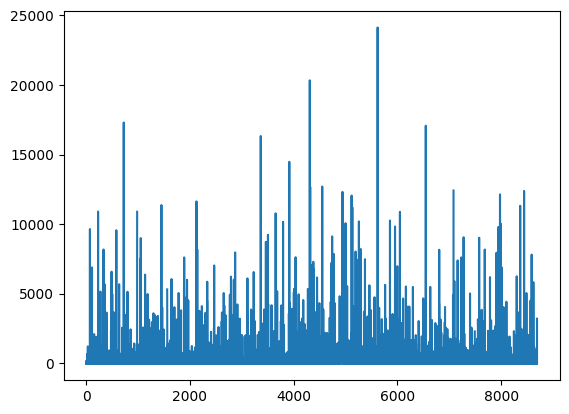

In [91]:
data['VRDeck'].plot.line()
plt.show()

Label Encoding

In [92]:
data.HomePlanet

,HomePlanet
0,Europa
1,Earth
2,Europa
3,Europa
4,Earth
...,...
8688,Europa
8689,Earth
8690,Earth
8691,Europa


In [95]:
encoder = LabelEncoder()